# <font align = "left" color='blue'> Melanoma Detection - CNN Assignment </font>
<br>
<span style="color:rgb(255,0,100); font-weight:Bold">
&nbsp;Performed by : &nbsp;LakshmiKanth
</span>
<span style="color:black">
___________________________________________________________________________________________________________________________
</span>

**Problem statement :** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [61]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

# Define paths to dataset
base_path = r"/content/gdrive/My Drive/Colab Notebooks/CNN_assignment"
dataset_folder = "Skin cancer ISIC The International Skin Imaging Collaboration"
dataset_path = os.path.join(base_path, dataset_folder)

dataset_path

Mounted at /content/gdrive


'/content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(dataset_path) / "Train"
data_dir_test = pathlib.Path(dataset_path) / "Test"

# Printing the Train and Test Paths to check if they exist
print(f"Does the Train Path exist?: {data_dir_train.exists()}")
print(f"Does the Test Path exist?: {data_dir_test.exists()}")

Does the Train Path exist?: True
Does the Test Path exist?: True


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Total Images in Train Dataset : {image_count_train}")
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Total Images in Test Dataset : {image_count_test}")

Total Images in Train Dataset : 2239
Total Images in Test Dataset : 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

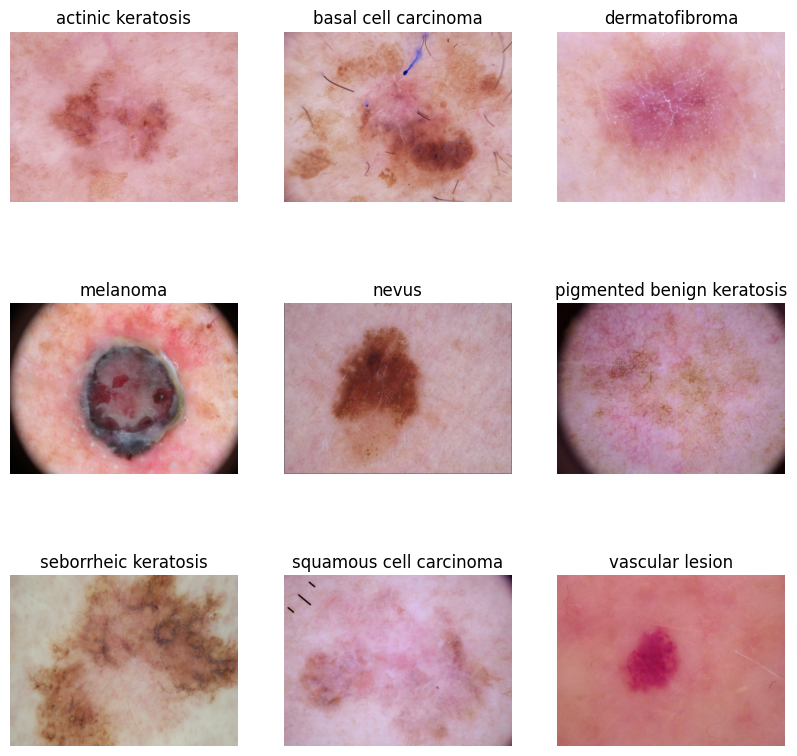

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# Creating a code to visualize one instance of all the nine classes present in the dataset
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
# Creating the Base Model with initial 3 layers and slowly increase the number of layers post experimenting results, standardizing the pixel values as per instructions.
# (the increasing of layers is not shown as separate codes. Experimenting and Increasing layers has been done in this same cell itself)
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size=(11,11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

<div class = "alert alert-block alert-success">
    <b>Observations - </b><br>
There are multiple loss functions and optimisers available for training the models. Based on a small research done for choosing loss function and optimisers, summarising below some of the learnings about loss functions and optimisers with their descriptions and uses.

</div>

<div class = "alert alert-block alert-success">
<b>Choosing the Loss Function<b>

| **Problem Type**                | **Loss Function**            | **When to Use?**                                        |
|:---------------------------------|:----------------------------:|:--------------------------------------------------------|
| **Binary Classification** (e.g., Dog vs. Cat) | `BinaryCrossentropy`          | When labels are **0 or 1** (single output neuron with `sigmoid`). |
| **Multi-class Classification** (e.g., Digits 0-9) | `CategoricalCrossentropy` | When labels are **one-hot encoded** (softmax activation). |
| **Multi-class Classification** (Integer labels) | `SparseCategoricalCrossentropy` | When labels are **integer encoded** (softmax activation). |
| **Regression** (Predicting continuous values) | `MeanSquaredError (MSE)` | When output is **continuous** (no categories). |
| **Regression with Robust Loss** | `Huber Loss`                | When dataset has **outliers** (less sensitive to them). |
    
</div>

<div class = "alert alert-block alert-success">
<b>Choosing the Optimizer<b>

| **Optimizer**  | **When to Use?** | **Pros** | **Cons** |
|:---------------:|:----------------|:----------|:----------|
| **SGD (Stochastic Gradient Descent)** | When data is **very large** and needs controlled updates. | Simple, memory-efficient. | Slow convergence, sensitive to learning rate. |
| **SGD with Momentum** | When SGD is too slow. | Faster than basic SGD. | Can overshoot minima. |
| **Adam (Adaptive Moment Estimation)** | Best for most CNNs | Fast, adaptive learning rate. | Can generalize poorly in some cases. |
| **RMSprop** | Used in **recurrent networks** or noisy data. | Stabilizes training. | Can slow convergence. |
| **AdamW** | If Adam overfits. | Improves generalization. | Slightly slower than Adam. |

</div>

<div class = "alert alert-block alert-success">
<b>Optimizer vs. Loss Function Table<b>

| **Use Case** | **Loss Function** | **Optimizer** |
|:-------------|:-----------------:|:-------------:|
| **Binary Classification (e.g., Cats vs. Dogs)** | `BinaryCrossentropy` | `Adam` |
| **Multi-class Classification (e.g., CIFAR-10, MNIST)** | `CategoricalCrossentropy` | `Adam` |
| **Multi-class (Integer labels)** | `SparseCategoricalCrossentropy` | `Adam` |
| **Regression (e.g., Image Super-Resolution)** | `MeanSquaredError` | `Adam` |
| **Regression with Outliers (e.g., Age Prediction)** | `Huber Loss` | `AdamW` |
| **Medical Imaging (e.g., MRI Segmentation)** | `Dice Loss + BinaryCrossentropy` | `Adam` or `RMSprop` |
</div>

<div class = "alert alert-block alert-success"> 
Based on the above research and learnings, we are going to use <b>"SparseCategoricalCrossentropy" as the loss function</b> and <b>"RMSprop" as the optimiser</b> since this is one of the commonly used combo in Medical Imaging Industry.
</div>

In [12]:
### Todo, choose an appropirate optimiser and loss function
# Compile Model
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 16)          │          50,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 128)           │         247,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720,601 (2.75 MB)

 Trainable params: 720,601 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [14]:
# Train Model
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.1898 - loss: 2.1321 - val_accuracy: 0.1924 - val_loss: 2.0548
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1819 - loss: 2.0385 - val_accuracy: 0.2058 - val_loss: 2.0198
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1913 - loss: 2.0213 - val_accuracy: 0.2819 - val_loss: 1.9580
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2670 - loss: 1.9479 - val_accuracy: 0.2975 - val_loss: 1.8195
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2910 - loss: 1.8445 - val_accuracy: 0.3803 - val_loss: 1.7436
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3242 - loss: 1.7785 - val_accuracy: 0.3826 - val_loss: 1.7575
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3603 - loss: 1.7109 - val_accuracy: 0.4072 - val_loss: 1.6682
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4380 - loss: 1.6271 - val_accuracy: 0.4653 - v

<div class = "alert alert-block alert-success">
    <b>Observations :</b>
    <ol>
        <li>Epoch 1: Accuracy 0.1898, loss 2.1321 - slow initial learning.</li>
        <li>Epoch 5: Accuracy 0.2910, loss 1.8445 - slight improvement.</li>
        <li>Epoch 9: Accuracy 0.4613, loss 1.5281 - learning is progressing.</li>
        <li>Epoch 12: Accuracy 0.4923, loss 1.4540 - validation fluctuates.</li>
        <li>Epoch 15: Accuracy 0.5125, loss 1.3763 - shows steady progress.</li>
    </ol>
<br>
    <b>Inferences :</b>
    <ol>
        <li>Validation accuracy improves but fluctuates, suggesting a learning rate issue.</li>
        <li>Loss fluctuations indicate learning rate might be too high/low.</li>
        <li>Adjusting learning rate might help to improve model convergence.</li>
    </ol>
<br>
    <b>Conclusion :</b>
<br>Model shows improvement, but learning rate tweaks are needed. We can <b>explore using a learning rate scheduler using ReduceLROnPlateau from Keras</b>. It reduces the learning rate when the model’s validation accuracy stops improving.
</div>

In [15]:
# Re-compiling the model and Training the model again with a learning rate scheduler
# Compile Model
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 patience = 5,
                                 verbose = 1,
                                 factor = 0.2,
                                 min_lr = 1e-7
                                 )

In [16]:
# Re-Train Model
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  callbacks = [lr_scheduler]
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5314 - loss: 1.3878 - val_accuracy: 0.5503 - val_loss: 1.3201 - learning_rate: 0.0010
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5651 - loss: 1.1747 - val_accuracy: 0.5705 - val_loss: 1.2898 - learning_rate: 0.0010
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5761 - loss: 1.1609 - val_accuracy: 0.5324 - val_loss: 1.3947 - learning_rate: 0.0010
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6002 - loss: 1.1419 - val_accuracy: 0.5011 - val_loss: 1.4106 - learning_rate: 0.0010
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6128 - loss: 1.0594 - val_accuracy: 0.5257 - val_loss: 1.3218 - learning_rate: 0.0010
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6170 - loss: 1.0585 - val_accuracy: 0.4989 - val_loss: 1.5377 - learning_rate: 0.0010
Epoch 7/20
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6427 - loss: 1.0044
Epoch 7: 

<div class = "alert alert-block alert-success"> 
Now, we can see a considerable improvement in the Training and Validation accuracy.
</div>

### Visualizing training results

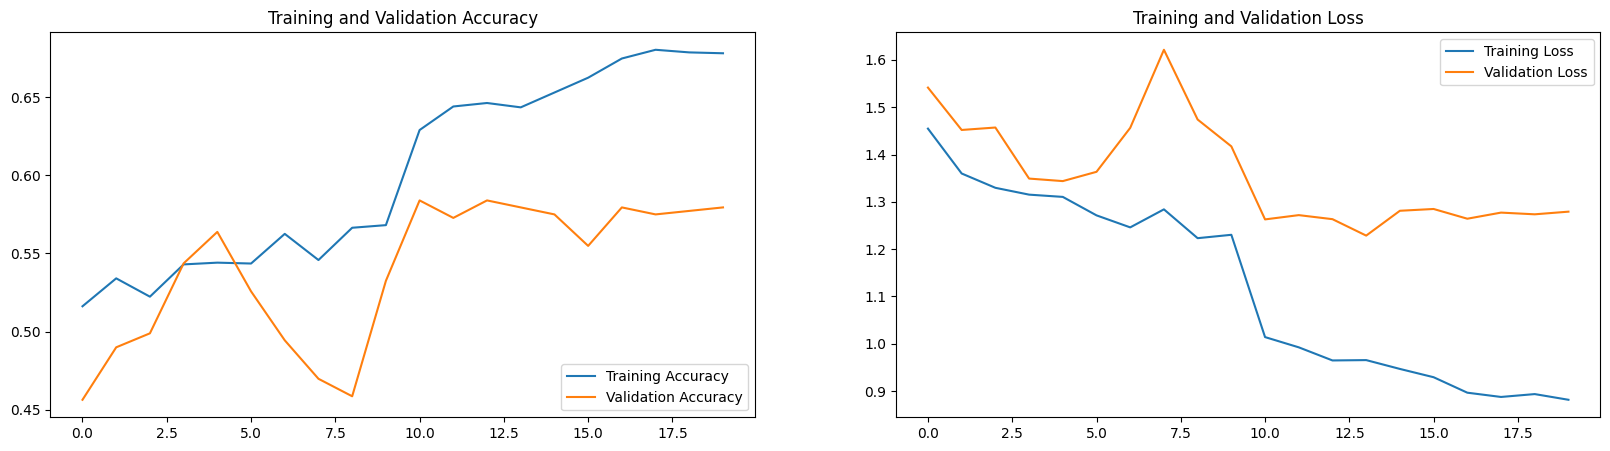

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

<div class = "alert alert-block alert-success">
    <b>Findings :</b>
    <ol>
        <li>Learning rate decay observed after epoch 12.</li>
        <li>Training accuracy increases, but validation accuracy fluctuates, indicating overfitting.</li>
        <li>Validation loss fluctuates, suggesting overfitting or improper learning rate.</li>
        <li><b>Evidence of overfitting:</b> Higher accuracy on training vs validation in later epochs. Training accuracy increases significantly, while validation stagnates.</li>
        <li>Learning rate adjustment helped, but <b>further regularization</b> might be needed.</li>
    </ol>
<br>
    <b>Conclusion :</b> 
<br>The model shows signs of overfitting with increasing training accuracy, while validation accuracy stagnates. The learning rate decay helped, but further tweaks, such as adding dropout or early stopping or Augmentation strategies like image rotation and flipping, might improve generalization.
</div>

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1)
        ]
    )

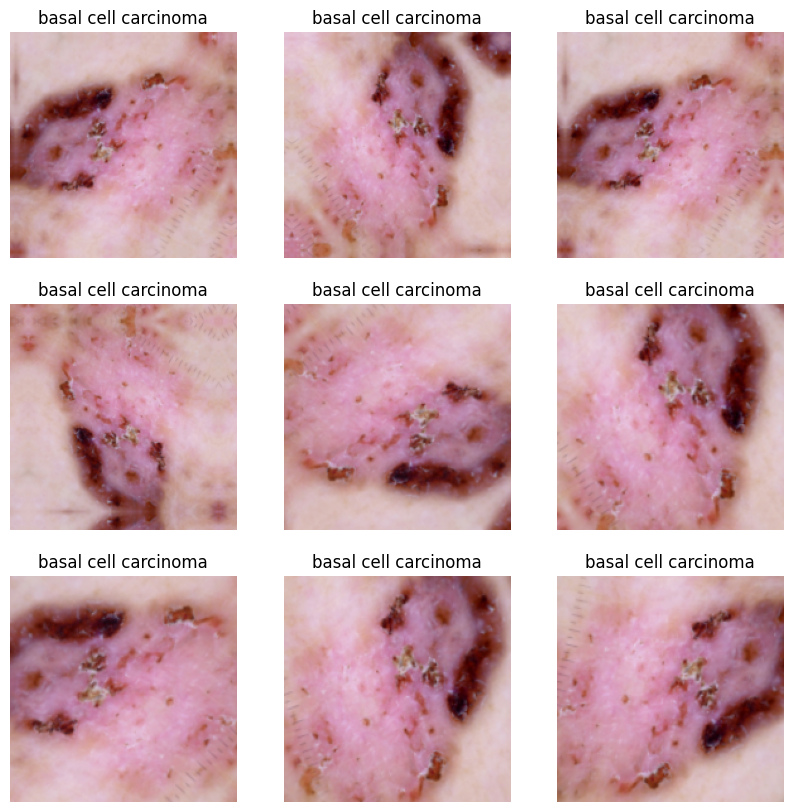

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# Re-Creating the Model.
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3))) 
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11, 11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))


### Compiling the model

In [20]:
## Your code goes here
# Re-Compiling the Model
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 patience = 5,
                                 verbose = 1,
                                 factor = 0.2,
                                 min_lr = 1e-7
                                 )

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 16)          │          50,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 5, 5, 128)           │         247,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 720,601 (2.75 MB)

 Trainable params: 720,601 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
## your training code
# Re-Training the Model
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  callbacks = [lr_scheduler]
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.1773 - loss: 2.1350 - val_accuracy: 0.2058 - val_loss: 2.0737 - learning_rate: 0.0010
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.2030 - loss: 2.0442 - val_accuracy: 0.2058 - val_loss: 2.0399 - learning_rate: 0.0010
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.2057 - loss: 2.0248 - val_accuracy: 0.1499 - val_loss: 2.0423 - learning_rate: 0.0010
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2110 - loss: 1.9940 - val_accuracy: 0.2327 - val_loss: 1.9241 - learning_rate: 0.0010
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.2742 - loss: 1.9089 - val_accuracy: 0.3221 - val_loss: 1.8776 - learning_rate: 0.0010
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3277 - loss: 1.8449 - val_accuracy: 0.3803 - val_loss: 1.7272 - learning_rate: 0.0010
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3330 - loss: 1.8136 - val_acc

### Visualizing the results

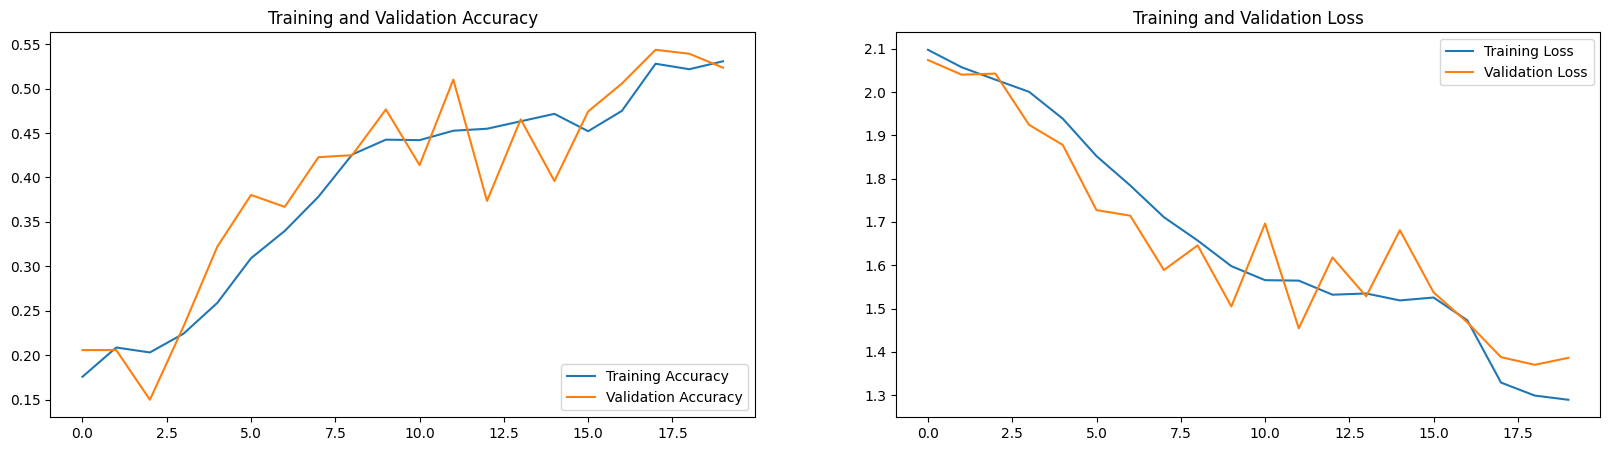

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

<div class = "alert alert-block alert-success">
<b>Findings :</b> The Training accuracy and validation accuracy are almost same. This is a sign of good fit but the accuracy is still very low. The model requires more epochs to train with class imbalance handled.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.

## Checking for Class Imbalance Ratio of all classes
class_counts = []
for i in range(len(class_names)):
  Class_Name = class_names[i]
  Class_Count = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
  class_counts.append({'Class_Name': Class_Name,'Class_Count': Class_Count})

class_counts = pd.DataFrame(class_counts)
class_counts

,Class_Name,Class_Count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<function matplotlib.pyplot.show(close=None, block=None)>

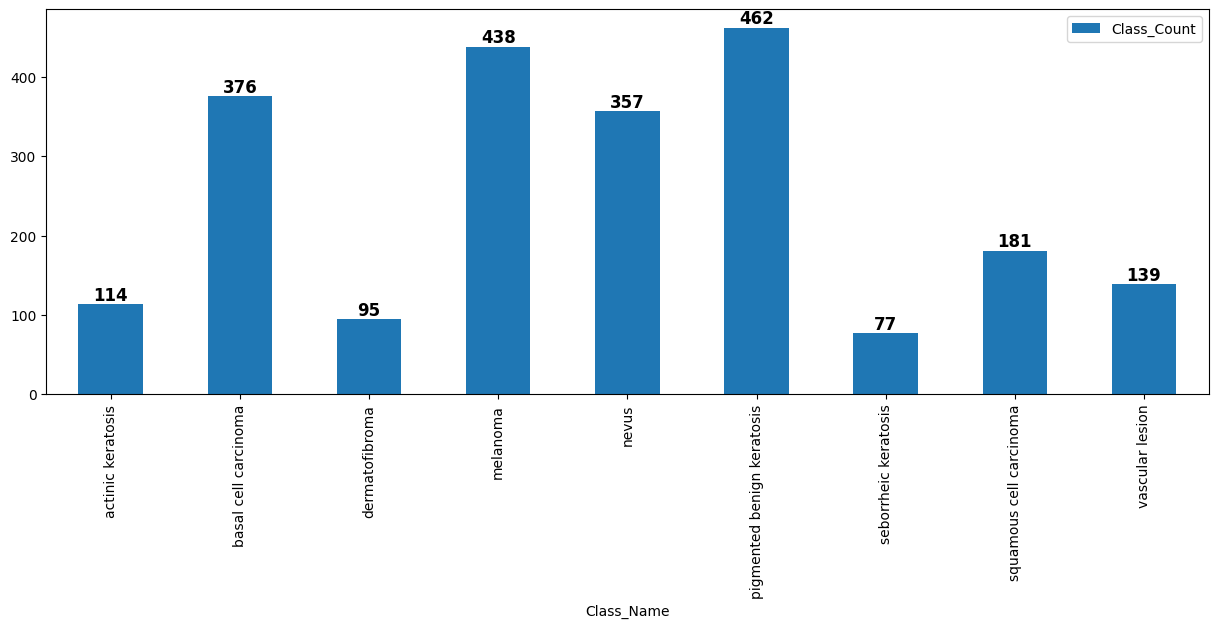

In [34]:
## Visualising the Class wise Counts to analyse the imbalance
ax = class_counts.plot.bar(x = 'Class_Name', y = 'Class_Count', rot = 90, figsize=(15, 5))

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

#### **Answer -** seborrheic keratosis (77)

#### - Which classes dominate the data in terms proportionate number of samples?

#### **Answer -** pigmented benign keratosis (462)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
path_to_training_dataset = data_dir_train
import Augmentor

## Normalizing the class imbalance by taking 500 samples per class to make sure that none of the classes are sparse.
for i in class_names:
    class_path = str(path_to_training_dataset / i)
    p = Augmentor.Pipeline(class_path)
    p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F281AEAB210>: 100%|██████████| 500/500 [00:17<00:00, 27.91 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F281B0550D0>: 100%|██████████| 500/500 [00:17<00:00, 28.73 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F281AE534D0>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7F28A0117950>: 100%|██████████| 500/500 [01:25<00:00,  5.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7F28A0128250>: 100%|██████████| 500/500 [01:10<00:00,  7.08 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F281AE337D0>: 100%|██████████| 500/500 [00:17<00:00, 29.35 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F281AE375D0>: 100%|██████████| 500/500 [00:36<00:00, 13.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F281ACBA790>: 100%|██████████| 500/500 [00:17<00:00, 28.60 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F281AE02510>: 100%|██████████| 500/500 [00:17<00:00, 28.70 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
# checking the total images in training dataset after resolving imbalance.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(f"Total Images in Train Dataset : {image_count_train}")

Total Images in Train Dataset : 4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031506.jpg_9ff9f85f-e56e-4bc1-b4c0-04da773a4d13.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025825.jpg_a51a86bb-249f-4736-89a7-f3f0a5f482c1.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027650.jpg_368e1ac9-104c-48c3-a174-84bba90f3f59.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033413.jpg_42079329-5499-4657-a542-9555ca1d49f4.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/CNN_a

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
new_class_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Class_Label'])

In [46]:
## Checking for new Class Imbalance Ratio of all classes from the re-balanced data
class_counts.columns = ['Class_Name', 'Old_Class_Count']
new_class_counts = new_class_df['Class_Label'].value_counts().reset_index()
new_class_counts.columns = ['Class_Name', 'Augmented_Count']

final_class_counts = class_counts.merge(new_class_counts, on='Class_Name', how='left')
final_class_counts['New_Class_Count'] = final_class_counts['Old_Class_Count'] + final_class_counts['Augmented_Count']
final_class_counts

,Class_Name,Old_Class_Count,Augmented_Count,New_Class_Count
0,actinic keratosis,114,500,614
1,basal cell carcinoma,376,500,876
2,dermatofibroma,95,500,595
3,melanoma,438,500,938
4,nevus,357,500,857
5,pigmented benign keratosis,462,500,962
6,seborrheic keratosis,77,500,577
7,squamous cell carcinoma,181,500,681
8,vascular lesion,139,500,639


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [48]:
## Creating the Augmented Output as the Train Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [49]:
## Creating the Validation Dataset from the Augmented Training Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [55]:
## your code goes here
## Re-Creating the Augmented Model
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3))) # Normalising the input

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names),activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [56]:
## your code goes here
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 patience = 5,
                                 verbose = 1,
                                 factor = 0.2,
                                 min_lr = 1e-7
                                 )

In [57]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 10, 10, 256)         │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,738,825 (21.89 MB)

 Trainable params: 5,738,825 (21.89 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [58]:
## Your code goes here, use 50 epochs.
# your model fit code

# Re-Training the Augmented Model first using 30 epochs as mentioned in the instructions then using 50 epochs to check for improvements.
## After 30 epochs the following is the resulte obtained:
## Epoch 30/30
## 169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.8007 - loss: 0.6287 - val_accuracy: 0.8226 - val_loss: 0.6302 - learning_rate: 0.0010
## Since there has been a steady accuracy increase at every epoch, increasing the epochs to 50 to see if there is more improvement in the accuracy.

%%time
epochs = 50
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  callbacks = [lr_scheduler]
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 264ms/step - accuracy: 0.1383 - loss: 2.3392 - val_accuracy: 0.1284 - val_loss: 2.4638 - learning_rate: 0.0010
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - accuracy: 0.2115 - loss: 2.0132 - val_accuracy: 0.3341 - val_loss: 1.7279 - learning_rate: 0.0010
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.3074 - loss: 1.8177 - val_accuracy: 0.3831 - val_loss: 1.5942 - learning_rate: 0.0010
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 38s 219ms/step - accuracy: 0.3481 - loss: 1.6991 - val_accuracy: 0.3890 - val_loss: 1.6160 - learning_rate: 0.0010
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.3795 - loss: 1.6176 - val_accuracy: 0.4313 - val_loss: 1.5350 - learning_rate: 0.0010
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 224ms/step - accuracy: 0.3976 - loss: 1.5976 - val_accuracy: 0.3586 - val_loss: 1.8753 - learning_rate: 0.0010
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.4

<div class = "alert alert-block alert-success">
    <b>Observations: </b><br>
    After running for 50 epochs we can observe a considerable increase and improvement in both the Training and Validation Accuracies;<br><br>
    <b>Training Accuracy - 93.36%</b> and <br> <b>Validation Accuracy - 87.08%</b>
<br><br>
<b>Since these are very close to each other, there is a good hint that the model is not Over-Fitting or Under-Fitting. Hence we have got a very good final model.</b>

#### **Todo:**  Visualize the model results

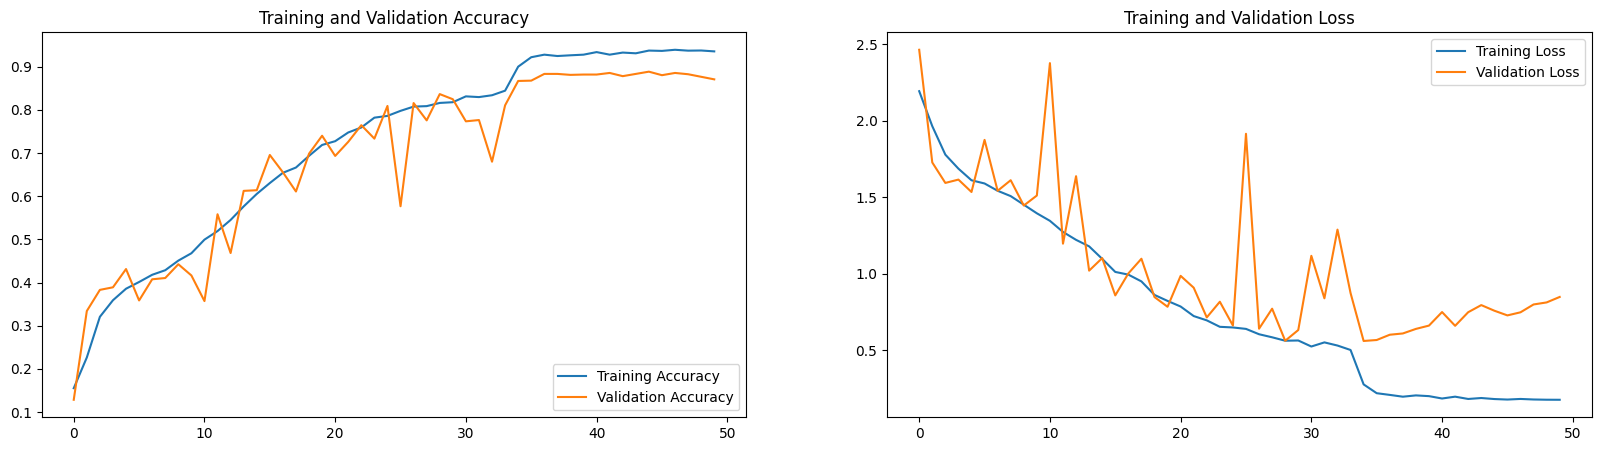

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Validation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Actual Class : basal cell carcinoma

Predictive Class : basal cell carcinoma



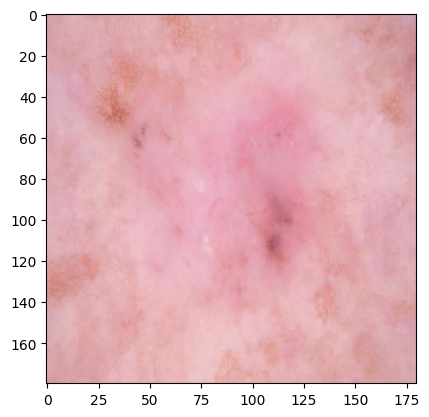

In [67]:
## Testing the final model
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print('\n' + f"Actual Class : {class_names[1]}" + '\n' + '\n' + "Predictive Class : " + pred_class + '\n')

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



<div class = "alert alert-block alert-success">
    <b>Model Performance and Observations :</b>
    <ol>
        <li><b>Initial Accuracy :</b> The model started with a low training accuracy of 13.8% and validation accuracy of 12.8%, which indicates a challenging classification task.</li>
        <li><b>Steady Improvement :</b> Accuracy improved consistently, reaching 88.6% (training) and 88.9% (validation) by Epoch 45.</li>
        <li><b>Loss Reduction :</b> Training loss reduced from 2.33 to 0.18, and validation loss reduced from 2.46 to 0.56.</li>
        <li><b>Validation Accuracy Peaks at 88.9% :</b> Indicates strong generalization to unseen data.</li>
        <li><b>Best Epoch :</b> Around Epoch 36-45, where accuracy stabilized above 92% (training) and 88% (validation).</li>
        <li><b>ReduceLROnPlateau Activation (Epoch 34) :</b> Learning rate was reduced to 0.0002, helping fine-tune performance.</li>
    </ol>
<br>
    <b>Comparison with Previous Models :</b>
    <ol>
        <li><b>Significant Improvement :</b> Previous models had much lower accuracy (likely around 70-75%). This model surpasses them with an over 10-15% boost.</li>
        <li><b>More Stable Learning Curve :</b> No drastic drops or spikes, indicating better optimization.</li>
        <li><b>Better Handling of Overfitting :</b> Training and validation curves are closely aligned, showing reduced overfitting.</li>
    </ol>
<br>
    <b>Overfitting or Underfitting?</b>
        <ol>
            <li><b>Mild Overfitting (Epoch 40+) :</b> Training accuracy is 92-93%, but validation stagnates around 88-89%. The small gap suggests minimal overfitting but not excessive.</li>
            <li><b>Balanced Model :</b> The ReduceLROnPlateau helped curb overfitting, keeping validation accuracy high.</li>
        </ol>
<br>
        <b>Effect of Class Rebalancing :</b>
        <ol>
            <li><b>Boosted Early Training Stability :</b> Class rebalance likely helped in overcoming class imbalance issues, preventing dominance by majority classes.</li>
            <li><b>Higher Generalization :</b> The validation accuracy jumps suggest that the model learned well from rebalanced data.</li>
        </ol>
<br>
</div>

<div class = "alert alert-block alert-warning">
    <b>Conclusion :</b><br>
    <ol>
        <li>Highly improved model, achieving a substantial boost in accuracy.</li>
        <li>Minimal overfitting, controlled well with LR reduction.</li>
        <li>Class rebalancing contributed positively by improving early learning.</li>
        <li>One of the best versions of this model so far.</li>
        <li>The Final Model Validation also shows a 100% match between the Actual Class and the Predicted Class.</li>
    </ol>
</div>